## Model Training

In [6]:
#importing the necessary libraries.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [4]:
# Data-loading
df = pd.read_csv("mushrooms.csv")

In [11]:
# Label-Encoding
enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = enc.fit_transform(df[col])

In [12]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# Decision Tree Classification

In [13]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Score: 0.9591226979916636


c:\mushroom-classification\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\mushroom-classification\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\mushroom-classification\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\mushroom-classification\venv\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\mushroom-

In [14]:
classifier = DecisionTreeClassifier(criterion="gini" , max_depth=8,max_features="log2",min_samples_leaf=1,min_samples_split=5)

In [15]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_features='log2', min_samples_split=5)

[Text(0.5803571428571429, 0.9444444444444444, 'x[10] <= 1.5\ngini = 0.499\nsamples = 7311\nvalue = [3775, 3536]'),
 Text(0.3464285714285714, 0.8333333333333334, 'x[11] <= 1.5\ngini = 0.487\nsamples = 5641\nvalue = [2374, 3267]'),
 Text(0.15714285714285714, 0.7222222222222222, 'x[8] <= 8.5\ngini = 0.121\nsamples = 2263\nvalue = [147, 2116]'),
 Text(0.05714285714285714, 0.6111111111111112, 'x[18] <= 3.0\ngini = 0.075\nsamples = 2128\nvalue = [83, 2045]'),
 Text(0.02857142857142857, 0.5, 'gini = 0.0\nsamples = 1960\nvalue = [0, 1960]'),
 Text(0.08571428571428572, 0.5, 'x[6] <= 0.5\ngini = 0.5\nsamples = 168\nvalue = [83, 85]'),
 Text(0.05714285714285714, 0.3888888888888889, 'gini = 0.0\nsamples = 85\nvalue = [0, 85]'),
 Text(0.11428571428571428, 0.3888888888888889, 'gini = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.2571428571428571, 0.6111111111111112, 'x[0] <= 2.5\ngini = 0.499\nsamples = 135\nvalue = [64, 71]'),
 Text(0.2, 0.5, 'x[6] <= 0.5\ngini = 0.462\nsamples = 58\nvalue = [21, 3

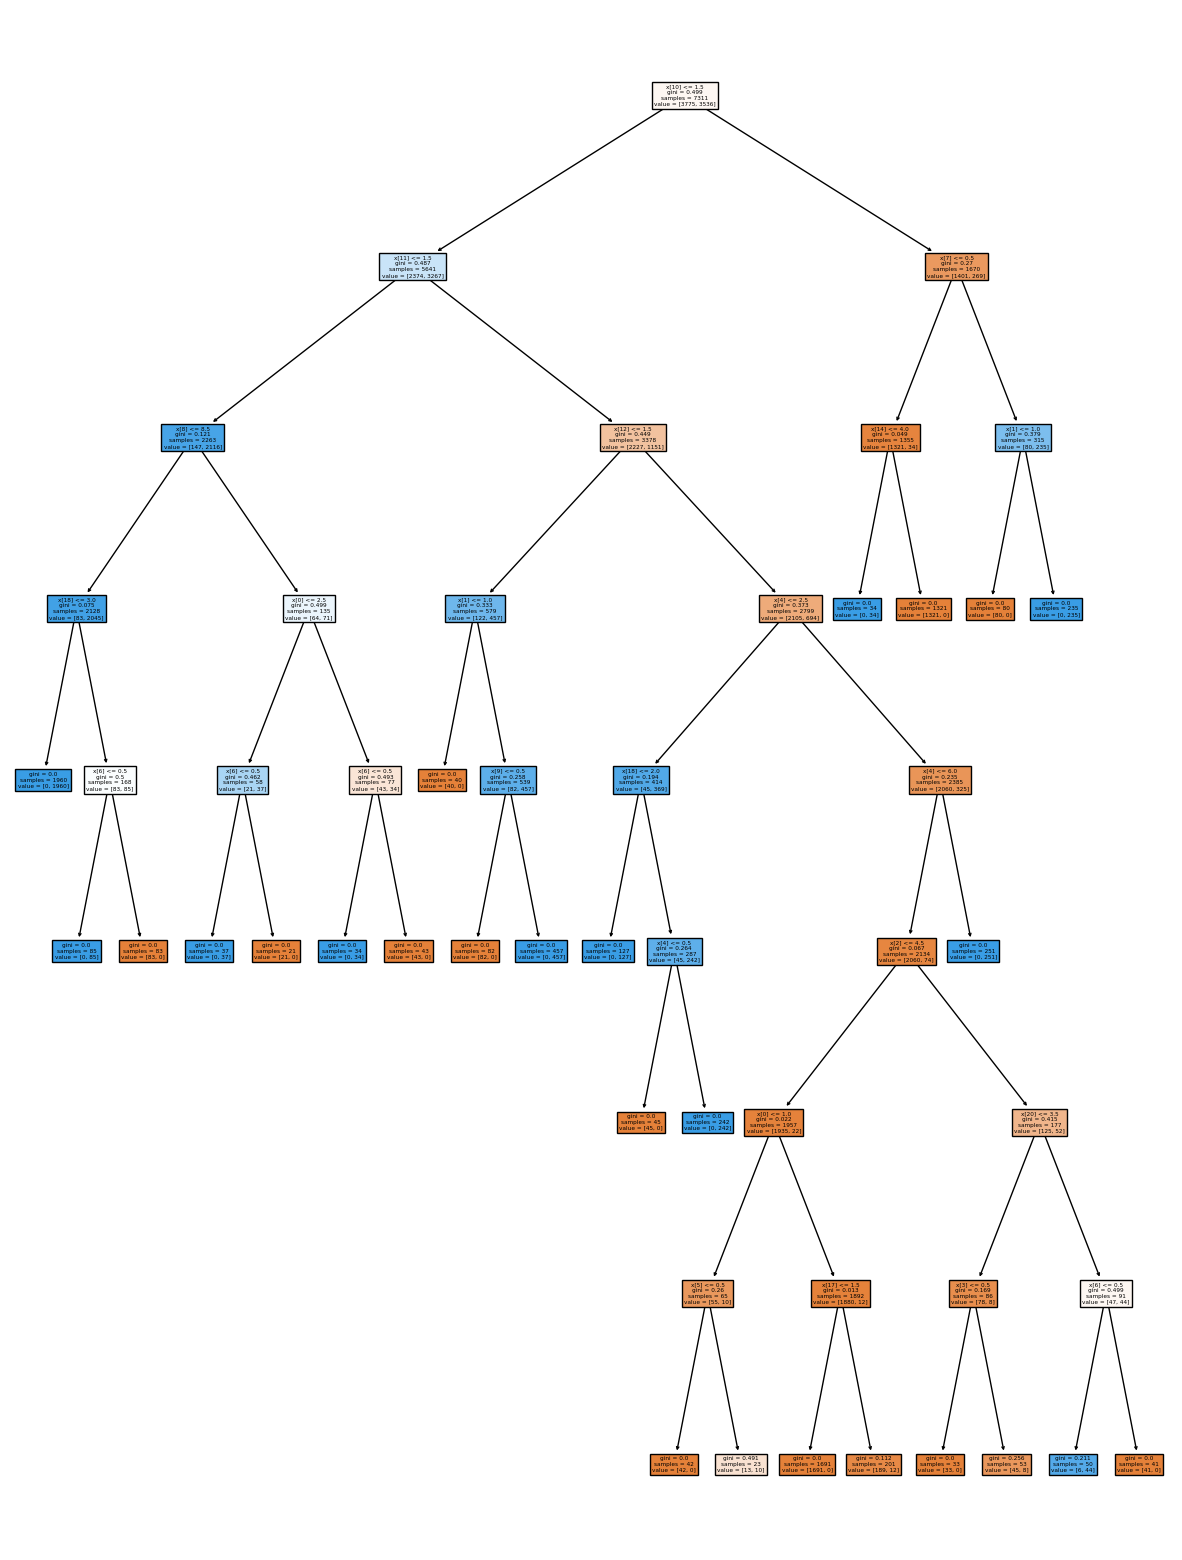

In [16]:
# Creating your Decision Tree
plt.figure(figsize=(15,20))
tree.plot_tree(classifier , filled = True)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       0.99      0.99      0.99       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [20]:
print("Test Accuracy: {}%".format(round(classifier.score(X_test, y_test)*100, 2)))

Test Accuracy: 99.51%


### Confusion Matrix for Decision Tree Classifier

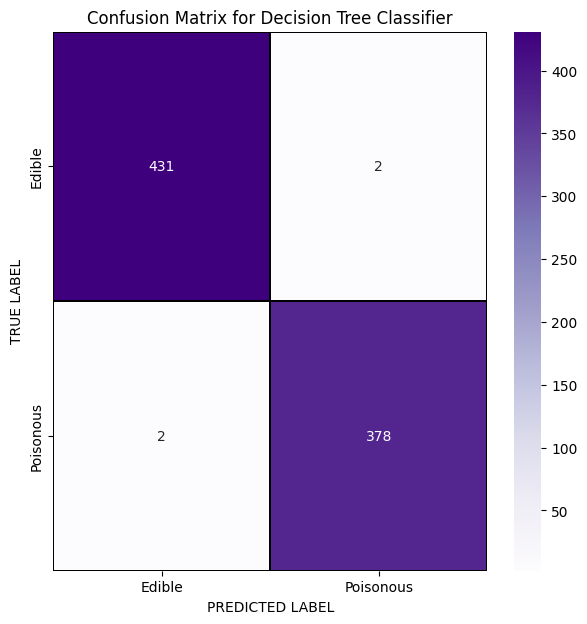

In [21]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# Logistic Regresion

In [17]:
# Applying the Logistic Regression to it : Binary Classification ( Edible or Not? )

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.96%


c:\mushroom-classification\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Classification report of Logistic Regression Classifier

In [22]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



### Confusion Matrix for Logistic Regression Classifier

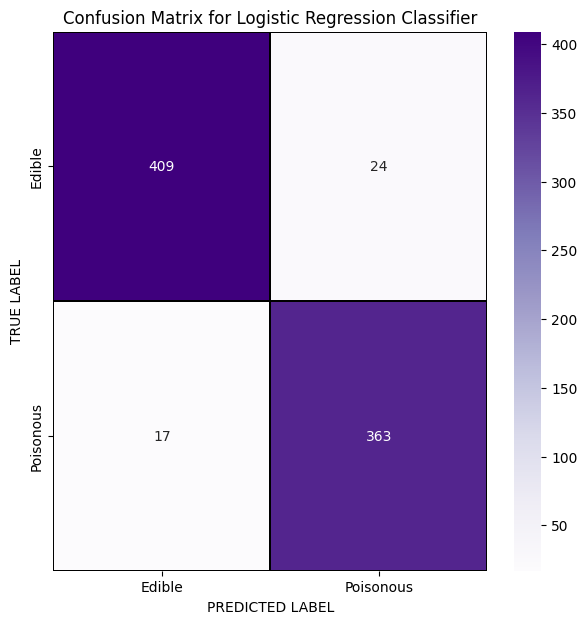

In [23]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# Predictions:

In [24]:
# DT CLASSIFICATION

preds = classifier.predict(X_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


In [25]:
# LR CLASSIFICATION

preds = lr.predict(X_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


# Conclusion :

From the confusion matrix, we saw that our train and test data is balanced.
Most of the classification methods hit 100% accuracy with this dataset.

In [26]:
#Serialization using the Pickle Module:
pickle.dump(lr,open('model.pkl','wb'))

In [27]:
pickled_model = pickle.load(open('model.pkl','rb'))
#batch-output
pickled_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,